## Visualise annotations on synthetic maps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from matplotlib.patches import Polygon as MplPolygon
import matplotlib.image as mpimg
import ast

In [2]:
ROOT = "E:/codes/cadastre_synth_maps"
path = f"{ROOT}/outputs"

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


ValueError: not enough values to unpack (expected 2, got 1)

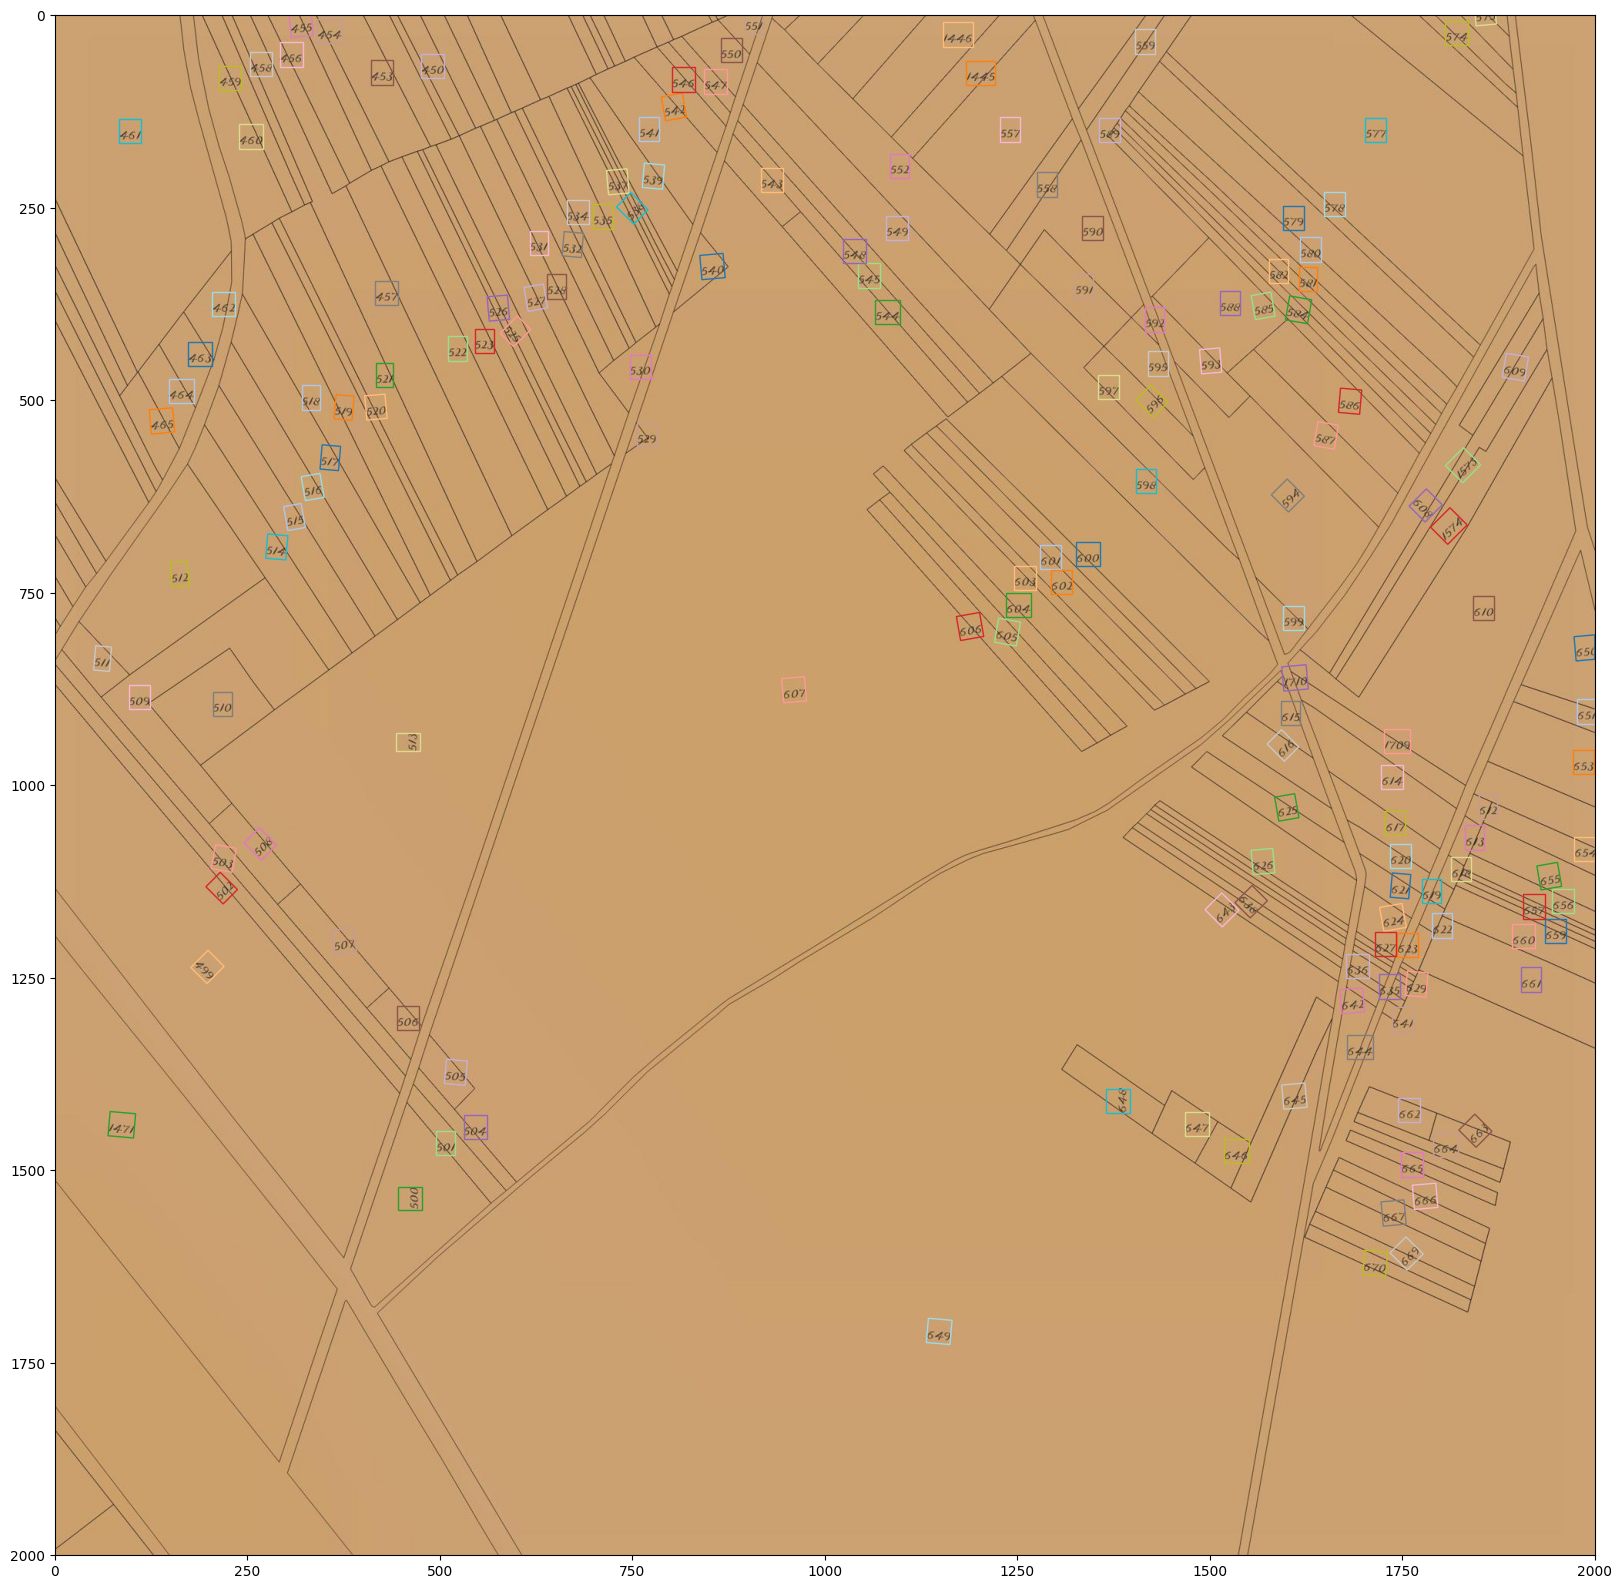

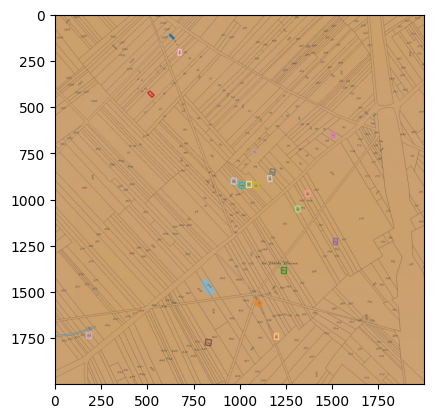

In [4]:
for i in range(3697,4500):
    zoneid = "region_" + str(i)
    csv_file = f"{path}/{zoneid}.csv"
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Image dimensions (adjust these to match your image)
    image_path = path + '/' + zoneid +'.jpg'
    img = mpimg.imread(image_path)
    img_height, img_width, _ = img.shape

    # Create a plot
    fig, ax = plt.subplots()
    ax.imshow(img)

    # Dictionary to store colors for each 'cle_origine'
    color_dict = {}

    # Convert the DataFrame to polygons and plot them
    for _, row in df.iterrows():
        print(_)
        # Create the polygon coordinates, convert geometry to list of coordinates with ast.literal_eval
        coordinates = ast.literal_eval(row['geometry'])
            
        # Create a polygon
        polygon = Polygon(coordinates)
            
        # Generate a color for each 'cle_origine' if not already in the dictionary
        if row['group_key'] not in color_dict:
            color_dict[row['group_key']] = plt.cm.tab20(len(color_dict) % 20)
            
        # Create a matplotlib polygon patch
        mpl_polygon = MplPolygon(list(polygon.exterior.coords), closed=True, 
                                    edgecolor=color_dict[row['group_key']], fill=False)
            
        # Add the patch to the plot
        ax.add_patch(mpl_polygon)

    # Set plot limits to image dimensions
    ax.set_xlim(0, img_width)
    ax.set_ylim(img_height, 0)  # Flip the y-axis to match image coordinates

    #increase fig resolution
    fig.set_size_inches(20, 20)
    #plt.show()
    fig.savefig(f'E:/codes/cadastre_synth_maps/viz/{zoneid}.png', dpi=fig.dpi)

In [55]:
plt.show()